0.9999999439624929
0.09900000005603751 0.09900000005603751
0.9999999439624929
0.09800000011207502 0.09800000011207502
0.9999999439624929
0.09700000016811253 0.09700000016811253
0.9999999439624929
0.09600000022415003 0.09600000022415003
0.9999999439624929
0.09500000028018754 0.09500000028018754
0.9999999439624929
0.09400000033622505 0.09400000033622505
0.9999999439624929
0.09300000039226256 0.09300000039226256
0.9999999439624929
0.09200000044830006 0.09200000044830006
0.9999999439624929
0.09100000050433757 0.09100000050433757
0.9999999439624929
0.09000000056037508 0.09000000056037508
0.9999999439624929
0.08900000061641258 0.08900000061641258
0.9999999439624929
0.08800000067245009 0.08800000067245009
0.9999999439624929
0.0870000007284876 0.0870000007284876
0.9999999439624929
0.0860000007845251 0.0860000007845251
0.9999999439624929
0.08500000084056261 0.08500000084056261
0.9999999439624929
0.08400000089660012 0.08400000089660012
0.9999999439624929
0.08300000095263763 0.08300000095263763
0

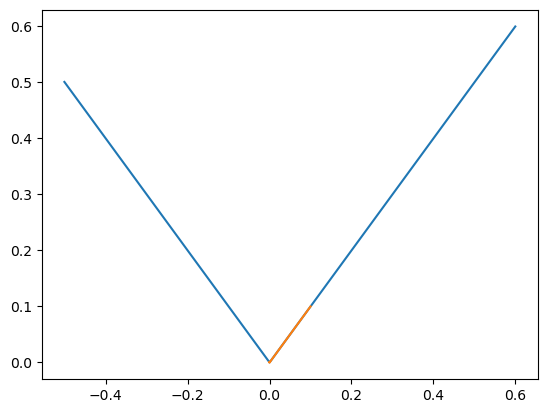

In [33]:
import numpy as np
import matplotlib.pyplot as plt


def f1(x):  #part A function
    return x ** 2


def f2(x):  #part B function
    return x ** 4 - 2 * x ** 2


def f3(x):  #part C function
    if x > 0:
        return x ** x
    elif x == 0:
        return 1
    else:
        return abs(x) ** abs(x)


def f4(x):  #part D function
    return abs(x)


# estimate the derivative of a function at a specific x
def dydx(f, x):
    return (f(x + 10 ** -10) - f(x - 10 ** -10)) / (2 * 10 ** -10)


def find_minimum(f, x0, learning_rate):
    # starting point
    x_coords = [x0]
    y_coords = [f(x0)]
    
    # counter variable so we can add to the x_coords and y_coords lists
    i = 1

    # keep getting x and y close to the minimum until the derivative is very close to zero
    #stop looking after too many iterations (in case of overshoot)
    while i < 10 ** 3 and abs(dydx(f, x_coords[i - 1])) > 10 ** -10:
        # get next x-coordinate closer to the x-coordinate of the minimum point
        x_coords.append(x_coords[i - 1] - learning_rate * dydx(f, x_coords[i - 1]))
        y_coords.append(f(x_coords[i]))  # get next y-coordinate based on next x-coordinate

        # print(dydx(f, x_coords[i - 1]))
        # print(x_coords[i], y_coords[i])
        i += 1  #increment i so we can add to the x_coords and y_coords

    # plotting portion
    plot_range = np.linspace(min(x_coords) - 0.5, max(x_coords) + 0.5, 10000)  # a nice plot range
    # to make look good
    function_range = [f(i) for i in plot_range]
    plt.plot(plot_range, function_range)  # this plots the function f(x)
    plt.plot(x_coords, y_coords)  # this will plot the sequence of points x_n, f(x_n)

    print(i)
    if i == 10 ** 3:
        return "Error! No minimum could be found. Try a different learning rate and/or starting x-value."
    else:
        return "Minimum of this function is at (" + str(round(x_coords[i - 1], 3)) + ", " + str(
            round(y_coords[i - 1], 3)) + ")."
    # last x_n and y_n, #rounded to three decimal places.


# controls user input, allows user to find different roots by trying different x0's and learning rates
def main():
    done = False

    while not done:
        function_name = (input("Enter a which function you want to minimize (1, 2, 3, 4): "))

        function = None

        if function_name == "1":
            function = f1
        elif function_name == "2":
            function = f2
        elif function_name == "3":
            function = f3
        elif function_name == "4":
            function = f4
        x0 = float(input("Enter a starting x-value for the optimization: "))
        learning_rate = float(input("Enter a learning rate for the optimization: "))

        print(find_minimum(function, x0, learning_rate))
        continue_or_not = input("Would you like to continue (yes or no): ")

        if continue_or_not.lower() == "no":
            done = True


main()
